# Generating the data for test functions

In this notebook we generate the data for the 4 test functions used throughout the paper. The univariate functions (Gramacy and Lee function & 1-D Schwefel function) will have 200 discrete samples. The bivariate functions (Dropwave function & 2-D Schwefel function) will have samples across 50 x 50 grid. All the data would be saved in pickle files

1. gramacy.p
2. Schwefel.p
3. Dropwave.p
4. Schwefel2d.p

For visualization purposes the last figure in this notebook will have denser discretization. But this would not be used in any computations.

## Importing the Libraries

In [1]:
from matplotlib.pyplot import *
from numpy import *
import pickle
from mpl_toolkits.mplot3d import Axes3D

## 1D

### Gramacy and Lee

In [2]:
## Gramacy and Lee
n = 200
x1 = linspace(0.5,2.5,n)
y1 = []
for i in x1:
    temp = (sin(10*pi*i))/(2*i) + (i-1)**4
    y1.append(temp)
flagx = max(max(x1),abs(min(x1)))
flagy = max(max(y1),abs(min(y1)))
y1 = array(y1)/flagy
x1 = x1/flagx

### Saving the pickle file
Data = zeros([len(x1),3])
Data[:,0] = x1
Data[:,2] = y1
pickle.dump( Data, open( "gramacy.p", "wb" ) )

### 1D Schwefel

In [3]:
## Schwefel
n = 200
x2 = linspace(-500,500,n)
y2 = []
for i in x2:
    temp = 418.9829 - i*sin(sqrt(abs(i)))
    y2.append(temp)
    

flagx = max(max(x2),abs(min(x2)))
flagy = max(max(y2),abs(min(y2)))
y2 = array(y2)/flagy
x2 = x2/flagx

### Saving the pickle file
Data = zeros([len(x2),3])
Data[:,0] = x2
Data[:,2] = y2
pickle.dump( Data, open( "Schwefel.p", "wb" ) )

## 2D

### Drop Wave function

In [4]:
n = 50
x3 = linspace(-2,2,n)
y3 = linspace(-2,2,n)
Z3 = zeros([n,n])
Data_temp = zeros([n*n,3])
cx = -1
cy = 0
count = 0
for i in x3:
    cy = 0
    cx = cx+1
    for j in y3:
        Z3[cx,cy] = -(1 + cos(12*sqrt(i*i + j*j)))/(0.5*i*i + 0.5*j*j+2)
        Data_temp[count,0] = x3[cx]
        Data_temp[count,1] = y3[cy]
        Data_temp[count,2] = Z3[cx,cy]
        count = count +1
        cy = cy + 1
flagx = max(max(x3),abs(min(x3)))
flagy = max(max(y3),abs(min(y3)))
flagz = max(amax(Z3),abs(amin(Z3)))
Data = []
for u in Data_temp:
    Data.append([u[0]/flagx,u[1]/flagy,u[2]/flagz])
Data = array(Data)

pickle.dump( Data, open( "Dropwave.p", "wb" ) )

### Schewefel-2D

In [5]:
n = 50
x4 = linspace(-500,500,n)
y4 = linspace(-500,500,n)
Z4 = zeros([n,n])
Data_temp = zeros([n*n,3])
cx = -1
cy = 0
count = 0
for i in x4:
    cy = 0
    cx = cx+1
    for j in y4:
        Z4[cx,cy] = 418.9829 - i*sin(sqrt(abs(i)))- j*sin(sqrt(abs(j)))
        Data_temp[count,0] = x4[cx]
        Data_temp[count,1] = y4[cy]
        Data_temp[count,2] = Z4[cx,cy]
        count = count +1
        cy = cy + 1

flagx = max(max(x4),abs(min(x4)))
flagy = max(max(y4),abs(min(y4)))
flagz = max(amax(Z4),abs(amin(Z4)))
Data = []
for u in Data_temp:
    Data.append([u[0]/flagx,u[1]/flagy,u[2]/flagz])
Data = array(Data)

pickle.dump( Data, open( "Schwefel2d.p", "wb" ) )

## Visualization of test function

For Visualization of the bivariate functions we will use a 200x200 grid

In [6]:
### Plotting the surface plot

## Dropwave
n = 200
x3 = linspace(-2,2,n)
y3 = linspace(-2,2,n)
Z3 = zeros([n,n])
Data_temp = zeros([n*n,3])
cx = -1
cy = 0
count = 0
for i in x3:
    cy = 0
    cx = cx+1
    for j in y3:
        Z3[cx,cy] = -(1 + cos(12*sqrt(i*i + j*j)))/(0.5*i*i + 0.5*j*j+2)
        Data_temp[count,0] = x3[cx]
        Data_temp[count,1] = y3[cy]
        Data_temp[count,2] = Z3[cx,cy]
        count = count +1
        cy = cy + 1
flagx = max(max(x3),abs(min(x3)))
flagy = max(max(y3),abs(min(y3)))
flagz = max(amax(Z3),abs(amin(Z3)))
X3mod, Y3mod = np.meshgrid(x3/flagx,y3/flagy)
Z3mod = Z3/flagz

## 2D Schewefel

n = 200
x4 = linspace(-500,500,n)
y4 = linspace(-500,500,n)
Z4 = zeros([n,n])
Data_temp = zeros([n*n,3])
cx = -1
cy = 0
count = 0
for i in x4:
    cy = 0
    cx = cx+1
    for j in y4:
        #Z4[cx,cy] = i**2 + 2*(j**2) - 0.3*cos(3*pi*i) - 0.4*cos(4*pi*j) + 0.7
        Z4[cx,cy] = 418.9829 - i*sin(sqrt(abs(i)))- j*sin(sqrt(abs(j)))
        Data_temp[count,0] = x4[cx]
        Data_temp[count,1] = y4[cy]
        Data_temp[count,2] = Z4[cx,cy]
        count = count +1
        cy = cy + 1

flagx = max(max(x4),abs(min(x4)))
flagy = max(max(y4),abs(min(y4)))
flagz = max(amax(Z4),abs(amin(Z4)))

X4mod, Y4mod = np.meshgrid(x4/flagx,y4/flagy)
Z4mod = Z4/flagz


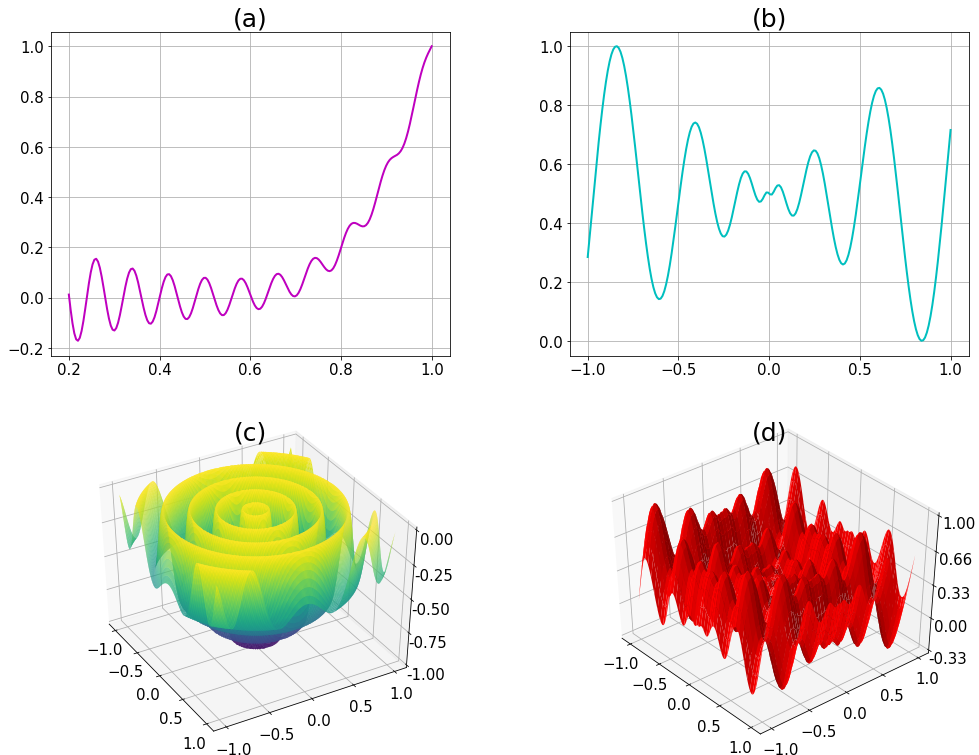

In [7]:
## Combining In one figure 4 figures
fig = figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1) 

ax.plot(x1,y1,color = 'm',lw = 2)
ax.grid(True)
#ax.set_xlabel('X',size = 20)
#ax.set_ylabel('Y',size = 20)
ax.set_title('(a)',size = 25)
tick_params(labelsize=15)
ax = fig.add_subplot(2, 2, 2) 
ax.plot(x2,y2,color = 'c', lw =2)
ax.grid(True)
#ax.set_xlabel('X',size = 20)
#ax.set_ylabel('Y',size = 20)
ax.set_title('(b)',size = 25)
tick_params(labelsize=15)


## Dropwave
# Plot the surface.
ax = fig.add_subplot(2, 2, 3, projection='3d') 
surf = ax.plot_surface(X3mod, Y3mod, Z3mod, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#surf = ax.plot_surface(X3mod, Y3mod, Z3mod,color='g',edgecolor='none',alpha = 0.4)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zticks([-1,-0.75,-0.5,-0.25,0])
ax.set_title('(c)',size= 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
#fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(40, 20)
ax.view_init(40, -30)

## Bohachevsky
ax = fig.add_subplot(2, 2, 4, projection='3d') 
# Plot the surface.
#surf = ax.plot_surface(X4mod, Y4mod, Z4mod, rstride=10, cstride=10,
#                cmap='viridis', edgecolor='none')

surf = ax.plot_surface(X4mod, Y4mod, Z4mod,color = 'r', edgecolor='none')

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zticks([-0.33,0,0.33,0.66,1])
ax.set_title('(d)',size= 25)
ax.view_init(40, -40)
#fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(40, 20)
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.3,hspace = 0.2)   # determines the padding on the graph
show()